In [66]:
# Import Libraries
# - Tensorflow
# - Keras
# - numpy and random

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

import random
import numpy as np

from matplotlib import pyplot
# plot the training  accuracy  
import matplotlib.pyplot as plt

%matplotlib inline

from tensorflow.python.summary.writer.writer import FileWriter
from sklearn.metrics import classification_report 
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 
                        # sets the graph-level random seed

tf.set_random_seed(42)

In [4]:
# Use the MNIST dataset  of Keras.

mnist = tf.keras.datasets.mnist

(Xtrain, Ytrain) , (Xtest, Ytest) = mnist.load_data()

In [5]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


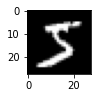

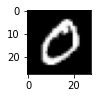

In [6]:
for i in range(2):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(Xtrain[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [13]:
print(Xtrain[7321].shape)

(28, 28)


In [14]:
print(Xtrain[7321])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   24  63  47   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  27 124 145
  238 254 248 228 151 139 134  50   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13  93 209 23

In [6]:
Xtrain = Xtrain.reshape((60000,28,28,1))

In [8]:
print(Xtrain[7321].shape)

(28, 28, 1)


In [17]:
print(Xtrain[7321])

[[[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]
  [  0]


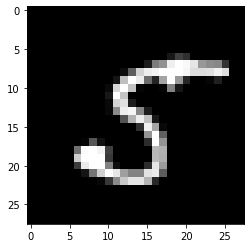

In [18]:
pyplot.imshow(Xtrain[7321], cmap=pyplot.get_cmap('gray'))

In [7]:
Xtrain = Xtrain.astype('float32')/255

In [21]:
print(Xtrain[7321])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

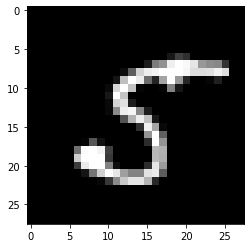

In [28]:
pyplot.imshow(Xtrain[7321], cmap=pyplot.get_cmap('gray'))

In [8]:
Xtest = Xtest.reshape((10000,28,28,1))
Xtest = Xtest.astype('float32')/255

In [9]:
Ytrain = tf.keras.utils.to_categorical(Ytrain)
Ytest = tf.keras.utils.to_categorical(Ytest) 

In [10]:
print(Xtrain.shape)
print(Ytrain.shape)
print(Xtest.shape)
print(Ytest.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [27]:
Ytrain[7321]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
# Create a Sequential model object
cnnModel = models.Sequential()

In [12]:
# Add layers Conv2D for CNN and specify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1) ))

In [13]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [39]:
# shows the weights in layer 0 conv2d as gray map
top_layer = cnnModel.layers[0]

In [47]:
top_layer.get_weights()[0][0][0][0]

array([ 0.1265333 ,  0.06348942,  0.05577128, -0.08238398,  0.4935591 ,
        0.0334188 , -0.11758409,  0.00635336,  0.13495861, -0.32052222,
        0.01922034, -0.16542618, -0.14947356,  0.04031222,  0.09631656,
       -0.36772376,  0.12798698,  0.03619368, -0.17905813, -0.12133043,
       -0.27446046, -0.04130213,  0.08849938,  0.01359227, -0.03534533,
        0.01786728, -0.11924466, -0.00716252, -0.00552008,  0.08526796,
       -0.06163226,  0.16645652], dtype=float32)

In [59]:
top_layer.get_weights()

[array([[[[ 0.1265333 ,  0.06348942,  0.05577128, -0.08238398,
            0.4935591 ,  0.0334188 , -0.11758409,  0.00635336,
            0.13495861, -0.32052222,  0.01922034, -0.16542618,
           -0.14947356,  0.04031222,  0.09631656, -0.36772376,
            0.12798698,  0.03619368, -0.17905813, -0.12133043,
           -0.27446046, -0.04130213,  0.08849938,  0.01359227,
           -0.03534533,  0.01786728, -0.11924466, -0.00716252,
           -0.00552008,  0.08526796, -0.06163226,  0.16645652]],
 
         [[ 0.08177073,  0.06639975,  0.09375671, -0.06289754,
           -0.02565195,  0.374376  ,  0.08519867, -0.17961462,
            0.17003115, -0.2651491 ,  0.19989529,  0.14538918,
           -0.14282945,  0.1479384 ,  0.23396818, -0.33020422,
            0.21602055, -0.06394646, -0.31120607,  0.01211179,
           -0.09013577, -0.06218663, -0.17559192, -0.0361843 ,
            0.0629676 , -0.45828202, -0.24769701,  0.00852704,
           -0.05543318,  0.13744122,  0.17051387, -

In [61]:
top_layer.get_weights()[0][:, :, :, 0]

array([[[ 0.1265333 ],
        [ 0.08177073],
        [-0.21447882]],

       [[-0.03830528],
        [ 0.17032911],
        [-0.10011859]],

       [[ 0.11070398],
        [ 0.1200898 ],
        [-0.11760078]]], dtype=float32)

In [104]:
top_layer.get_weights()[0][:, :, :, 31].squeeze()

array([[ 0.16645652, -0.10802237, -0.01556318],
       [ 0.18579805,  0.10124914, -0.30395243],
       [ 0.21803789,  0.17762567, -0.397097  ]], dtype=float32)

In [108]:
top_layer.get_weights()[0][:, :, :, 31].squeeze()

array([[ 0.16645652, -0.10802237, -0.01556318],
       [ 0.18579805,  0.10124914, -0.30395243],
       [ 0.21803789,  0.17762567, -0.397097  ]], dtype=float32)

In [129]:
top_layer.get_weights()[0].shape

(3, 3, 1, 32)

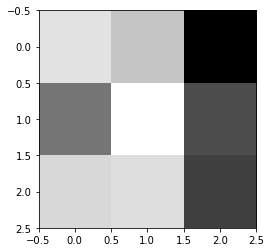

In [65]:
plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
plt.show()

In [14]:
# Layer 1 :: Pooling Operation.

cnnModel.add(layers.MaxPooling2D((2,2)))

In [15]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Layer 2
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu"))

In [17]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [132]:
# shows the weights in layer 2nd.
secondLayer = cnnModel.layers[2]
secondLayer.get_weights()[0].shape


(3, 3, 32, 64)

In [133]:
secondLayer.get_weights()[0][:, :, :, 63].squeeze()

array([[[ 0.08252131,  0.10161035,  0.02726924, -0.04855417,
         -0.08568852,  0.15352103, -0.05711965, -0.0754234 ,
         -0.19967681,  0.14228003, -0.19983305, -0.08691407,
         -0.19490814,  0.09651524,  0.12214764,  0.19616933,
         -0.01095991,  0.1403525 , -0.23511665,  0.04127808,
          0.03516266, -0.15199867,  0.08018119,  0.05067412,
          0.0802592 , -0.1162355 ,  0.02176716, -0.09292055,
         -0.02862219, -0.20035845, -0.17213108,  0.0104082 ],
        [ 0.25526088,  0.02969054,  0.20529388,  0.11335508,
         -0.03414411,  0.16292165, -0.05708887, -0.03025855,
         -0.00445004, -0.21267202,  0.21383364, -0.07752204,
         -0.12919359,  0.00128177,  0.06530918, -0.26730502,
          0.02749144,  0.01087732, -0.28466958, -0.04349634,
         -0.26193517, -0.07795662,  0.05947652,  0.16976532,
          0.03576358, -0.35259303,  0.04221774,  0.00795996,
         -0.0531702 ,  0.12960014,  0.24263507,  0.03656036],
        [-0.06341784, 

In [18]:
# Layer 2 :: Pooling Operation.

cnnModel.add(layers.MaxPooling2D((2,2)))

In [19]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [20]:
# Layer 3
cnnModel.add(layers.Conv2D(64, (3,3), activation="relu" ))

In [21]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Layer 3: Flattening Operation

cnnModel.add(layers.Flatten())

In [23]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [24]:
# Add Dense layers or fully connected layers
# Layer 4

cnnModel.add(layers.Dense(64, activation="relu" ))

In [26]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [27]:
# Layer 5
cnnModel.add(layers.Dense(32, activation="relu" ))
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [28]:
# Layer 6
cnnModel.add(layers.Dense(10, activation="softmax" ))
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [30]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

cnnModel.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [31]:
# train the model

history = cnnModel.fit(Xtrain, Ytrain, epochs = 25, batch_size = 64, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
53952/54000 [============================>.] - ETA: 0s - loss: 0.2257 - acc: 0.9304

/Users/B0218162/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


54000/54000 [==============================] - 19s 346us/sample - loss: 0.2255 - acc: 0.9305 - val_loss: 0.0634 - val_acc: 0.9802
Epoch 2/25
54000/54000 [==============================] - 18s 341us/sample - loss: 0.0647 - acc: 0.9806 - val_loss: 0.0437 - val_acc: 0.9885
Epoch 3/25
54000/54000 [==============================] - 20s 366us/sample - loss: 0.0445 - acc: 0.9861 - val_loss: 0.0413 - val_acc: 0.9890
Epoch 4/25
54000/54000 [==============================] - 27s 496us/sample - loss: 0.0357 - acc: 0.9891 - val_loss: 0.0573 - val_acc: 0.9822
Epoch 5/25
54000/54000 [==============================] - 27s 504us/sample - loss: 0.0273 - acc: 0.9911 - val_loss: 0.0352 - val_acc: 0.9905
Epoch 6/25
54000/54000 [==============================] - 25s 469us/sample - loss: 0.0236 - acc: 0.9927 - val_loss: 0.0415 - val_acc: 0.9890
Epoch 7/25
54000/54000 [==============================] - 25s 455us/sample - loss: 0.0191 - acc: 0.9938 - val_loss: 0.0349 - val_acc: 0.9915
Epoch 8/25
54000/54000 [

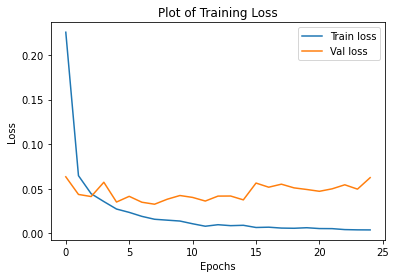

In [32]:
# plot the training loss

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Training Loss')
plt.legend()
plt.show()

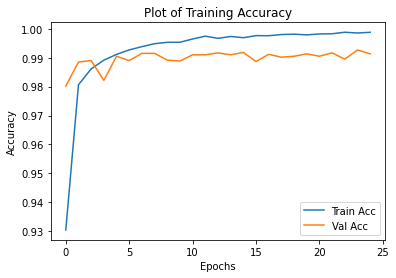

In [33]:
# plot the training accuracy

plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Training Accuracy')
plt.legend()
plt.show()

In [35]:
print('Final training loss \t', history.history['loss'][-1])
print('Final training accuracy ', history.history['acc'][-1])

Final training loss 	 0.0039030827263778285
Final training accuracy  0.9987778


In [72]:
Xtest.shape

(10000, 28, 28, 1)

In [73]:
Xtest[0].shape

(28, 28, 1)

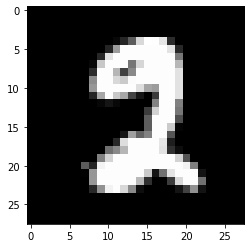

In [91]:
pyplot.imshow(Xtest[7349], cmap=pyplot.get_cmap('gray'))

In [92]:
Ytest[7349]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
# testing the model

testLoss, testAccuracy = cnnModel.evaluate( Xtest, Ytest)

In [38]:
print('Testing loss \t', testLoss)
print('Testing accuracy ', testAccuracy)

Testing loss 	 0.05239579783737028
Testing accuracy  0.9906


In [83]:
Y_Pred_By_CNN_Model = cnnModel.predict(Xtest)

/Users/B0218162/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


In [85]:
Y_Pred_By_CNN_Model.shape

(10000, 10)

In [93]:
Y_Pred_By_CNN_Model[7349]

array([4.8305561e-17, 1.6314396e-17, 1.0000000e+00, 9.5497259e-21,
       1.1147429e-22, 1.3325944e-24, 1.8553243e-18, 8.1844674e-14,
       9.5990518e-17, 1.3368517e-23], dtype=float32)

In [97]:
# Convert predictions classes from one-hot-encoded vectors to the mathematical-numbers.

Y_pred_classes = np.argmax(Y_Pred_By_CNN_Model, axis = 1) 

In [98]:
Y_pred_classes[7349]

2

In [99]:
# Convert validation observations to one hot vectors
Y_true = np.argmax(Ytest,axis = 1) 

In [100]:
Y_true[7349]

2

In [101]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



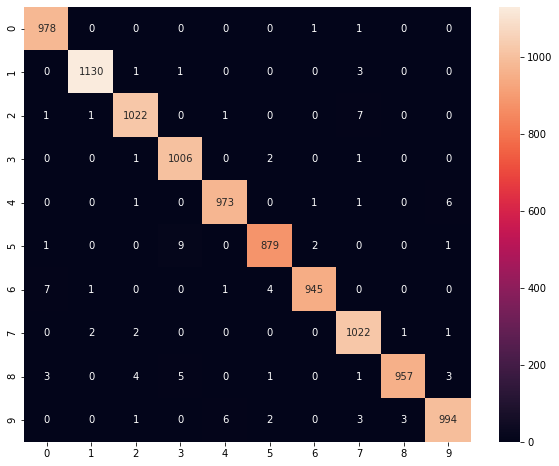

In [134]:
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt="d");